In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
%matplotlib inline

In [11]:
env = gym.make('FrozenLake-v0')

In [3]:
lr = 0.80
gamma = 0.95
n_episodes = 2000

In [4]:
def test_Q(Q):
    env = gym.make('FrozenLake-v0')
    s = env.reset()
    for j in range(100):
        # determine the next action
        a = np.argmax(Q[s,:])
        # take the action
        s, r, d, _ = env.step(a)
        # exit condition
        if d == True:
            break
    return j, r

In [5]:
def multi_test_Q(Q, n_test):
    jList = np.zeros(n_test)
    rList = np.zeros(n_test)
    for n in range(n_test):
        j, r = test_Q(Q)
        jList[n] = j
        rList[n] = r
    success_rate = rList.sum()/n_test
    avg_n_steps = jList.mean()
    return avg_n_steps, success_rate

In [9]:
# initialize Q
Q = np.zeros((env.observation_space.n, env.action_space.n))
Q_ = np.zeros((env.observation_space.n, env.action_space.n))
dQ = np.zeros(n_episodes)
avg_n_steps = np.zeros(n_episodes)
success_rate = np.zeros(n_episodes)

for n in tqdm(range(n_episodes)):
    s = env.reset()
    for j in range(100):
        # determine the next action
        noise = np.random.randn(1,env.action_space.n)*(1./(n+1))
        a = np.argmax(Q[s,:]+noise)
        # take the action
        s1, r, d, _ = env.step(a)
        # update Q[s,a]
        Q[s,a] = (1-lr) * Q[s,a] \
               + lr     * (r + gamma*np.max(Q[s1,:]))
        # update the state
        s = s1
        # exit condition
        if d == True:
            break
    # run the test
    avg_n_steps[n], success_rate[n] = multi_test_Q(Q, n_test=2)
    dQ[n] = ((Q_-Q)**2).sum()
    Q_ = Q.copy()
    

100%|██████████| 2000/2000 [00:08<00:00, 222.49it/s]


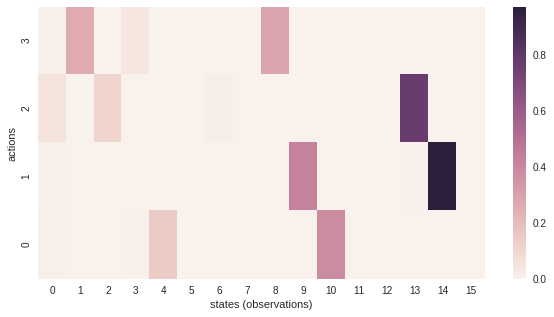

In [50]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(Q.T)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_ylabel('actions')
ax.set_xlabel('states (observations)')
_ = plt.plot()